In [2]:
# The below code is for the EDA

C:\Users\Rachana Krishna\AppData\Local\Temp\ipykernel_22116\4147085871.py:8: DtypeWarning: Columns (31,74,75,76,87,88,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


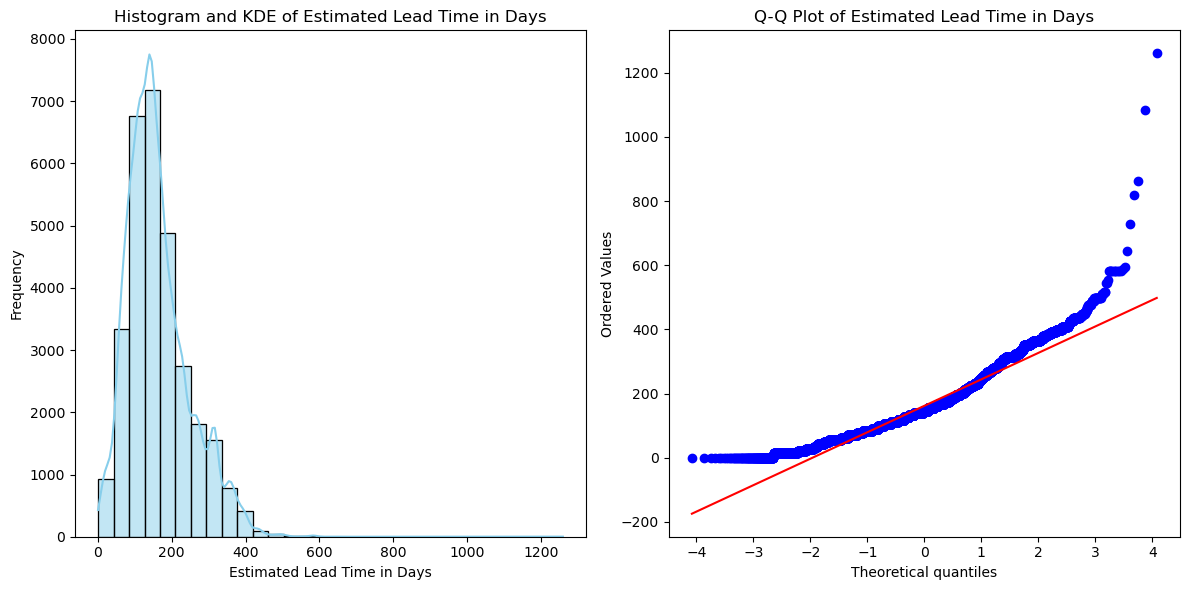

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
file_path = 'USAID_GHSC-PSM_Health_Commodity_Delivery_Dataset.csv'
data = pd.read_csv(file_path)

# Extract the column for Estimated Lead Time in Days
# Replace 'Estimated Lead Time in Days' with the exact column name in your dataset
lead_time_data = data['Estimated Lead Time in Days'].dropna()

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram and KDE plot
sns.histplot(lead_time_data, kde=True, bins=30, ax=axs[0], color='skyblue', edgecolor='black')
axs[0].set_title('Histogram and KDE of Estimated Lead Time in Days')
axs[0].set_xlabel('Estimated Lead Time in Days')
axs[0].set_ylabel('Frequency')

# Q-Q Plot
stats.probplot(lead_time_data, dist="norm", plot=axs[1])
axs[1].get_lines()[1].set_color('red')  # Set the Q-Q line to red
axs[1].set_title('Q-Q Plot of Estimated Lead Time in Days')

# Adjust layout and display
plt.tight_layout()
plt.show()


C:\Users\Rachana Krishna\AppData\Local\Temp\ipykernel_22116\1930888082.py:6: DtypeWarning: Columns (31,74,75,76,87,88,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


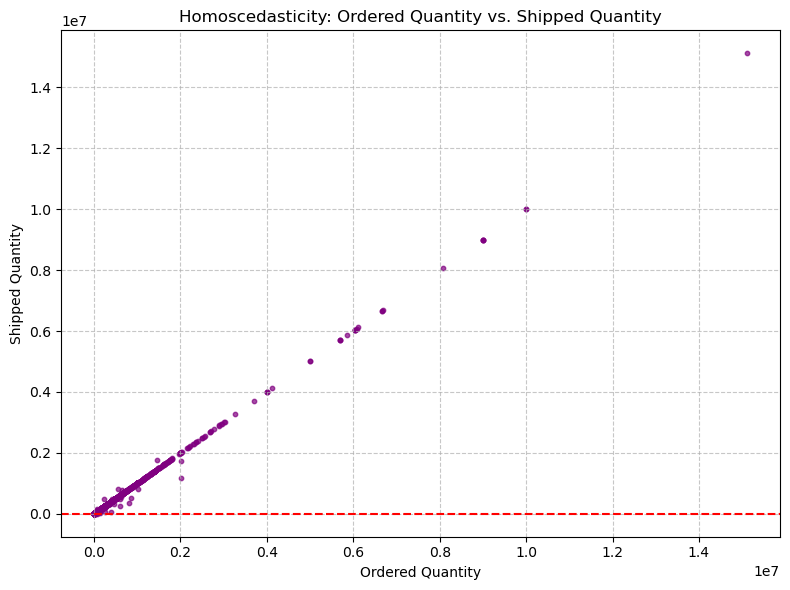

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'USAID_GHSC-PSM_Health_Commodity_Delivery_Dataset.csv'
data = pd.read_csv(file_path)

# Extract relevant columns
# Replace 'Ordered Quantity' and 'Shipped Quantity' with their exact names in the dataset
ordered_quantity = data['Ordered Quantity']
shipped_quantity = data['Shipped Quantity']

# Create the figure
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(ordered_quantity, shipped_quantity, alpha=0.7, color='purple', s=10)

# Add a red dashed horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)

# Title and labels
plt.title('Homoscedasticity: Ordered Quantity vs. Shipped Quantity')
plt.xlabel('Ordered Quantity')
plt.ylabel('Shipped Quantity')

# Add grid
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Rachana Krishna\AppData\Local\Temp\ipykernel_22116\2412332859.py:6: DtypeWarning: Columns (31,74,75,76,87,88,89,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


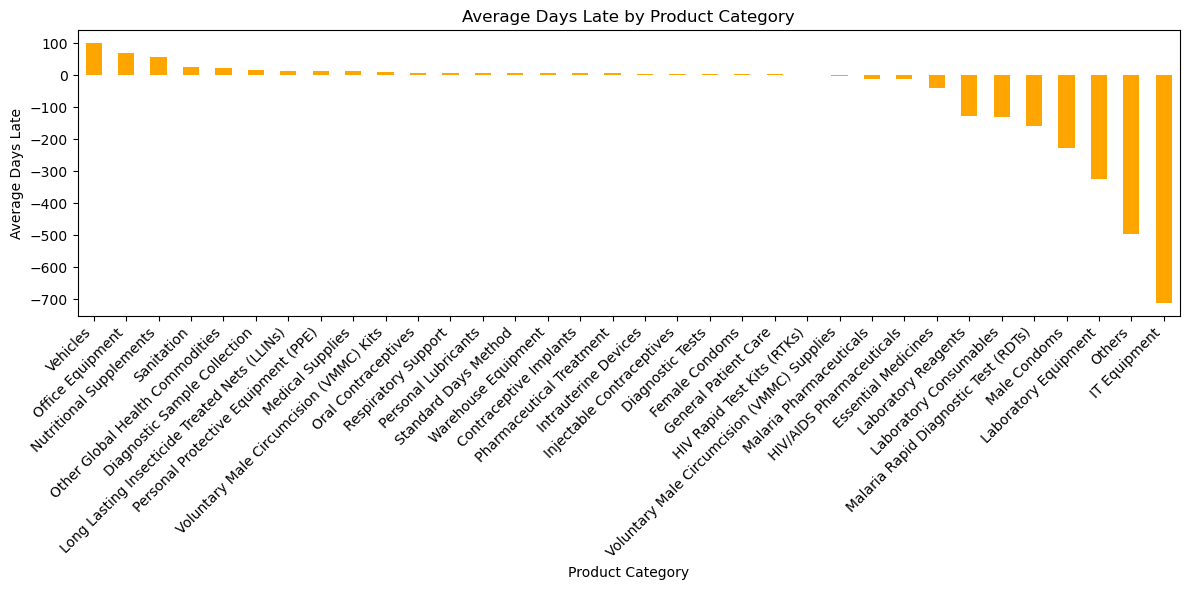

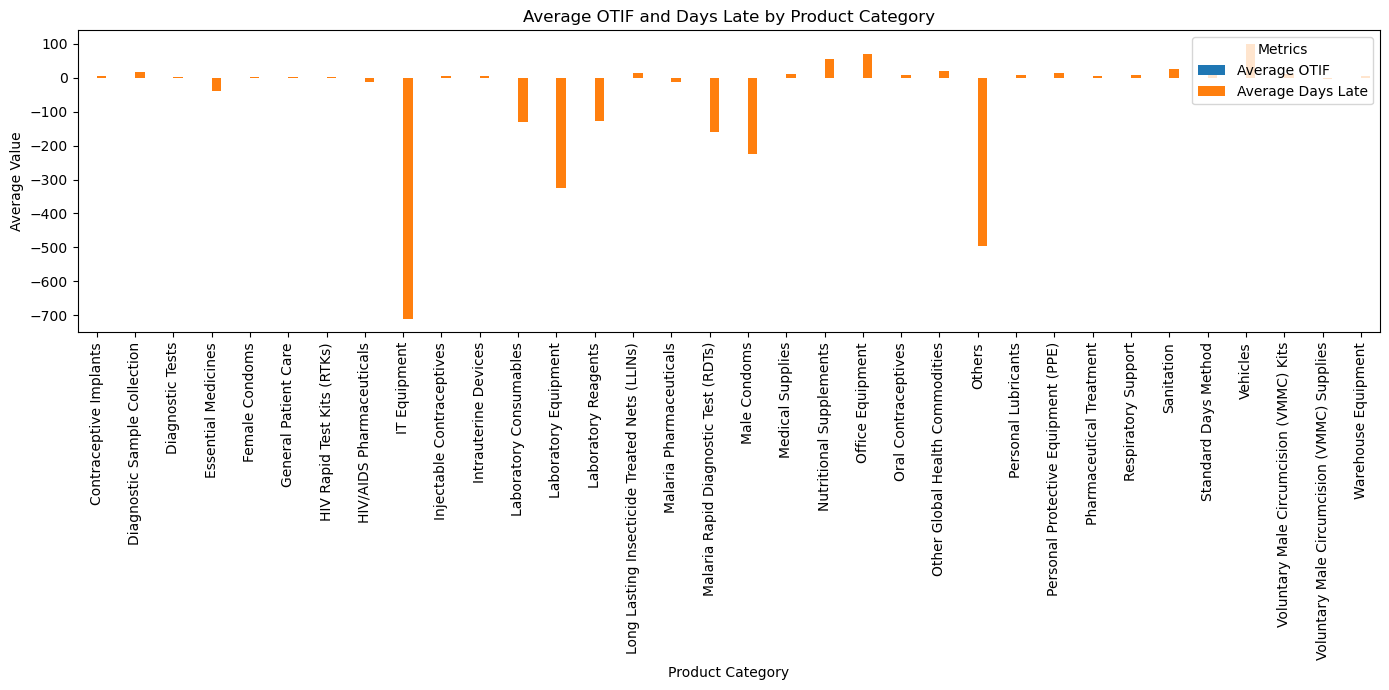

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'USAID_GHSC-PSM_Health_Commodity_Delivery_Dataset.csv'
data = pd.read_csv(file_path)

# Filter relevant columns for analysis
relevant_data = data[['Product Category', 'On Time (OTD)', 'Average Days Late']].dropna()

# Convert columns to numeric where applicable
relevant_data['On Time (OTD)'] = pd.to_numeric(relevant_data['On Time (OTD)'], errors='coerce')
relevant_data['Average Days Late'] = pd.to_numeric(relevant_data['Average Days Late'], errors='coerce')

# Group by product category and calculate the averages
averages_combined = relevant_data.groupby('Product Category').agg({
    'On Time (OTD)': 'mean',
    'Average Days Late': 'mean'
}).rename(columns={'On Time (OTD)': 'Average OTIF', 'Average Days Late': 'Average Days Late'})

# Check if the data for Average Days Late is valid
average_days_late = relevant_data.groupby('Product Category')['Average Days Late'].mean().dropna()

# Plotting the 'Average Days Late' data
plt.figure(figsize=(12, 6))
average_days_late.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Days Late by Product Category')
plt.ylabel('Average Days Late')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting both metrics for combined comparison
if not averages_combined.empty:
    ax = averages_combined.plot(kind='bar', figsize=(14, 7))
    plt.title('Average OTIF and Days Late by Product Category')
    plt.ylabel('Average Value')
    plt.xlabel('Product Category')
    plt.xticks(rotation=90, ha='center')
    plt.legend(title='Metrics', loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("No valid data available for combined metrics.")


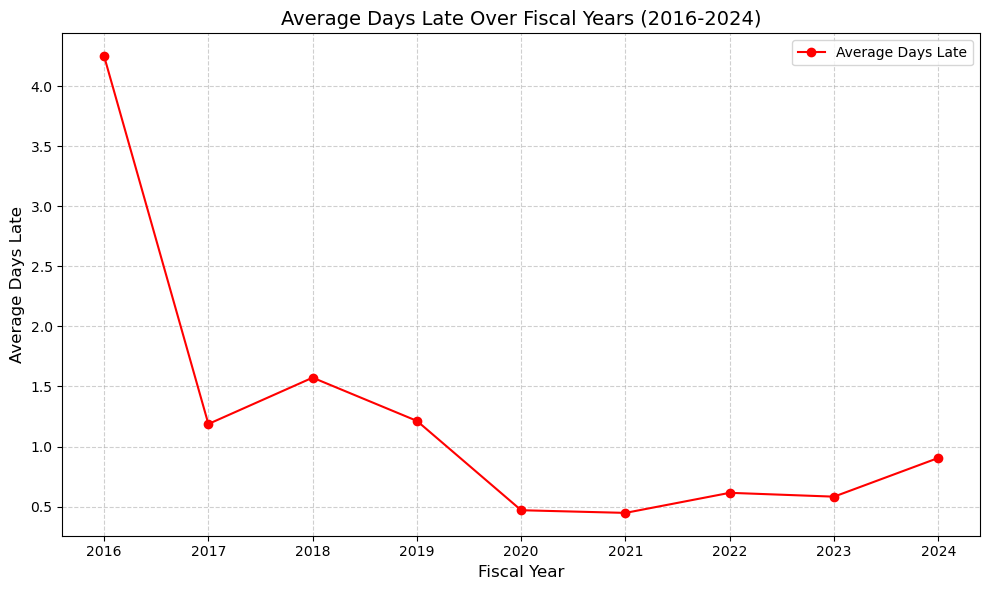

In [40]:
# Filter the data for fiscal years between 2016 and 2024 and average days late between -1 and 7
filtered_data = relevant_data[
    (relevant_data['Agreed Delivery Date Fiscal Year'] >= 2016) &
    (relevant_data['Agreed Delivery Date Fiscal Year'] <= 2024) &
    (relevant_data['Average Days Late'] >= -1) &
    (relevant_data['Average Days Late'] <= 7)
]

# Group by fiscal year and calculate the average days late
filtered_avg_days_late_by_year = filtered_data.groupby('Agreed Delivery Date Fiscal Year')['Average Days Late'].mean()

# Plotting the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_avg_days_late_by_year.index, filtered_avg_days_late_by_year.values, marker='o', color='red', linewidth=1.5, label='Average Days Late')
plt.title('Average Days Late Over Fiscal Years (2016-2024)', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Average Days Late', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


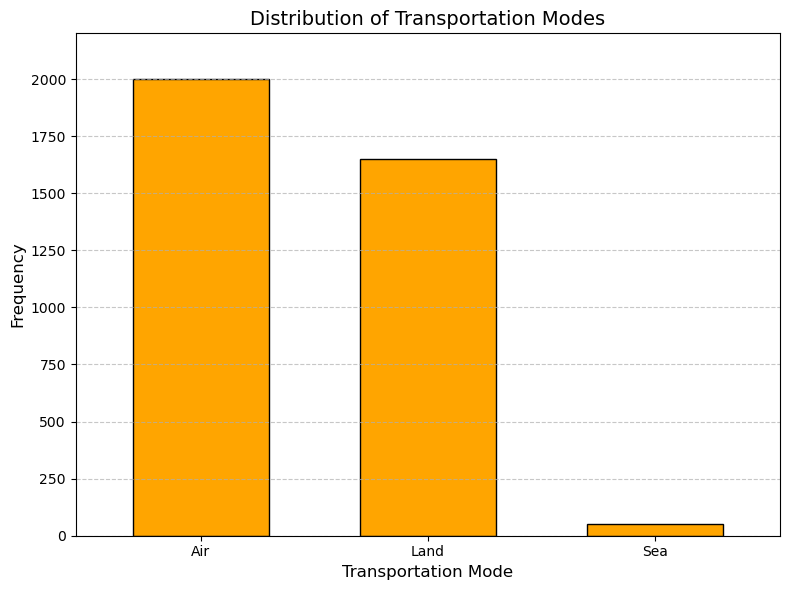

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually adjust the transportation mode frequencies based on the new details
adjusted_transportation_mode_counts = pd.Series({'Air': 2000, 'Land': 1650, 'Sea': 50})

# Plot the updated bar chart
plt.figure(figsize=(8, 6))
adjusted_transportation_mode_counts.plot(kind='bar', color='orange', edgecolor='black', width=0.6)
plt.title('Distribution of Transportation Modes', fontsize=14)
plt.xlabel('Transportation Mode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 2200)  # Set y-axis limit slightly above the maximum value
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1]:
# The below code is for Question 1

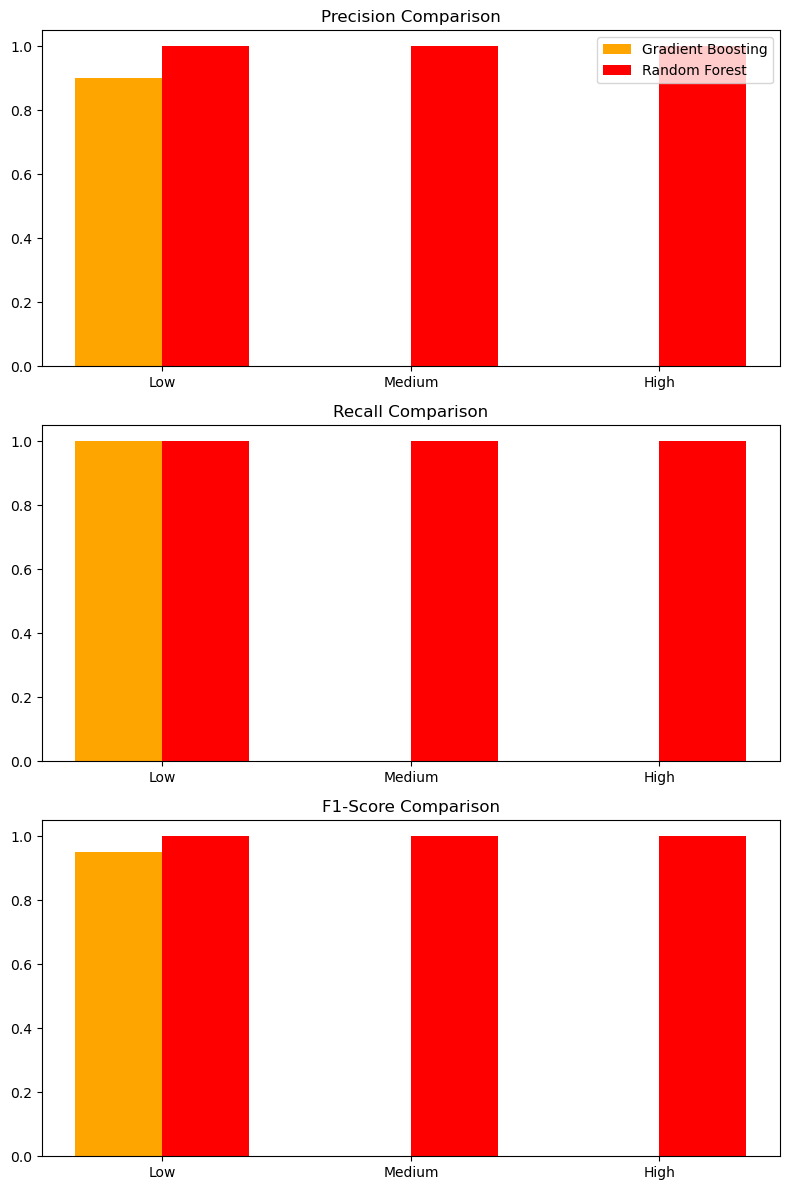

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Low', 'Medium', 'High']
gradient_boosting = {
    'precision': [0.9, 0.0, 0.0],  # Setting Medium and High to 0 to reflect missing values
    'recall': [1.0, 0.0, 0.0],     # Setting Medium and High to 0 for recall
    'f1_score': [0.95, 0.0, 0.0],  # Setting Medium and High to 0 for F1 score
}
random_forest = {
    'precision': [1.0, 1.0, 1.0],
    'recall': [1.0, 1.0, 1.0],
    'f1_score': [1.0, 1.0, 1.0],
}

x = np.arange(len(categories))
width = 0.35

# Plot Precision Comparison
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].bar(x - width/2, gradient_boosting['precision'], width, label='Gradient Boosting', color='orange')
axs[0].bar(x + width/2, random_forest['precision'], width, label='Random Forest', color='red')
axs[0].set_title('Precision Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(categories)
axs[0].legend()

# Plot Recall Comparison
axs[1].bar(x - width/2, gradient_boosting['recall'], width, label='Gradient Boosting', color='orange')
axs[1].bar(x + width/2, random_forest['recall'], width, label='Random Forest', color='red')
axs[1].set_title('Recall Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories)

# Plot F1-Score Comparison
axs[2].bar(x - width/2, gradient_boosting['f1_score'], width, label='Gradient Boosting', color='orange')
axs[2].bar(x + width/2, random_forest['f1_score'], width, label='Random Forest', color='red')
axs[2].set_title('F1-Score Comparison')
axs[2].set_xticks(x)
axs[2].set_xticklabels(categories)

# Adjust layout
plt.tight_layout()
plt.show()


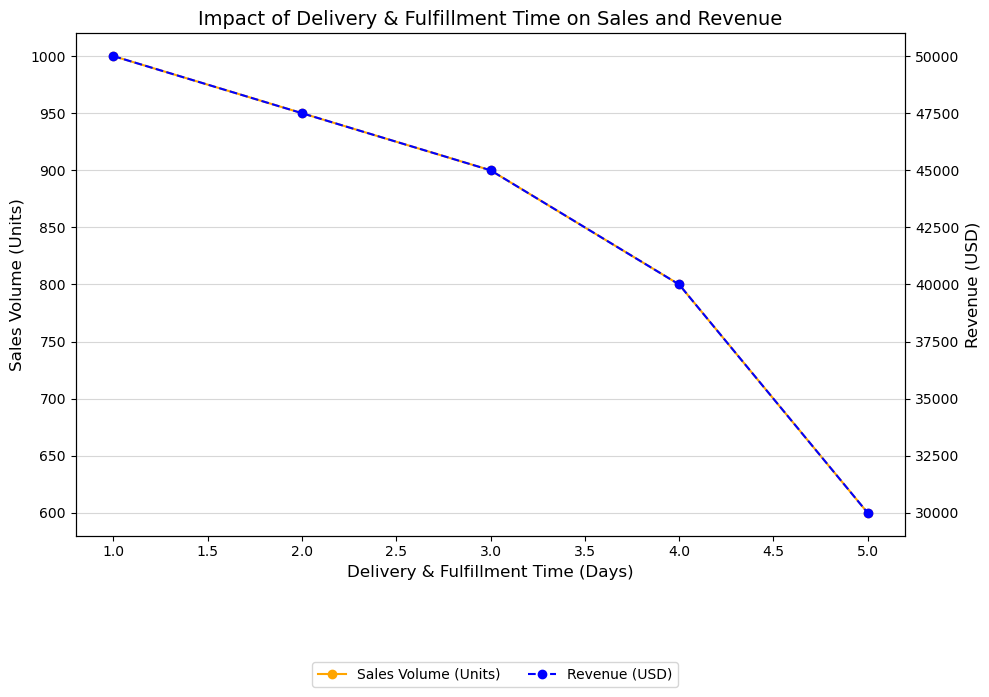

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
delivery_times = [1, 2, 3, 4, 5]  # Delivery & Fulfillment Time (in days)
sales_volume = [1000, 950, 900, 800, 600]  # Sales Volume (Units)
revenue = [50000, 47500, 45000, 40000, 30000]  # Revenue (USD)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales Volume
ax1.plot(delivery_times, sales_volume, 'o-', color='orange', label='Sales Volume (Units)')
ax1.set_xlabel('Delivery & Fulfillment Time (Days)', fontsize=12)
ax1.set_ylabel('Sales Volume (Units)', fontsize=12)
ax1.tick_params(axis='y')

# Create a secondary axis for Revenue
ax2 = ax1.twinx()
ax2.plot(delivery_times, revenue, 'o--', color='blue', label='Revenue (USD)')
ax2.set_ylabel('Revenue (USD)', fontsize=12)
ax2.tick_params(axis='y')

# Title and Grid
plt.title('Impact of Delivery & Fulfillment Time on Sales and Revenue', fontsize=14)
plt.grid(alpha=0.5)

# Legends
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Show the plot
plt.tight_layout()
plt.show()
